In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde
from sklearn.metrics import classification_report, confusion_matrix

## Objective

<blockquote> 
Use a decision tree model to predict customer churn (the percentage of customers that stopped using a company’s product or service during a certain time frame).
    
<blockquote>

## Why is Churn Rate important

<blockquote>
With subsctiption based businesses, customer retention is important, as it directly affects the profitability, it has a impact on how a business grows, whether customers are moving to nearest competitor. So this will have an influence on whether the business is growing, the rate they are losing or gaining customers is a great focus for businesses.
</blockquote>

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

## The Data

<blockquote>
We have a Data set of 7043 customers, which consist of 21 rows, including customerID, gender, SeniorCitizen, Partner, Dependents,tenure, PhoneService, MultipleLines, InternetService,OnlineSecurity', OnlineBackup, DeviceProtection, TechSupport,StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges and the Churn. We want to further investigate as to which of these features affects the rate at which customers churn, the insights gained will attempt to descrease the churn rate and help the business focus on key areas to imporve business processes.
</blockquote>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Values

<blockquote>
<b>Numerical Values -</b> Included within the numerical values were the Tenure,Monthly Charges, Senior Citizenship. In order to investigate the Skewness, which showed that the distribution of Senior Citizens was not symmetrical, the Kurtosis helped us determine whether the distribuiton was very narrow of peaked. 
    
</blockquote>

In [7]:
data_summary = df.describe()
data_summary.loc['skewness'] = df.skew()
data_summary.loc['kurtosis'] = df.kurtosis()
data_summary

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000
skewness,1.833633,0.239540,-0.220524
kurtosis,1.362596,-1.387372,-1.257260


## Churned Customers

<blockquote>
Out of the 7043 Customers, there were 1869 customers who churned, this is a loss of over 26% of the customer base.
</blockquote>


## Exploratory Data Analysis

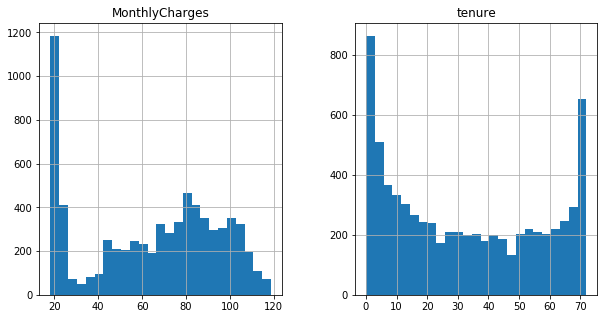

In [8]:
series = ['tenure', 'MonthlyCharges']
df[series].hist(bins=25, figsize=(10, 5))
plt.show()

## Numerical Values

<blockquote>
Taking into consideration the numerical values we have which exlcuded the Senior Citizens, We found that customers are more likely to churn in the early months of the subscription, this rate descreases as more months are added to their tenure, it is also observed that customers who pay between the mean and the maximum have a higher churn rate. From Previous investigation of the Skewness and Kurtosis, the data is not symmetrically distributed and peaks at certain points.
</blockquote>

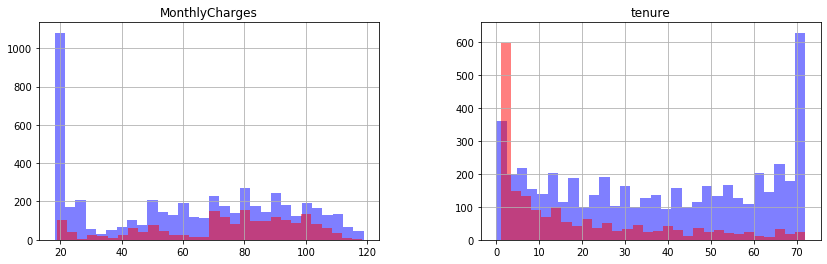

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == "No"][series].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][series].hist(bins=30, color="red", alpha=0.5, ax=ax)
plt.show()

## Numerical Values VS Churn

<blockquote>
With further investag
</blockquote>

## Taking a closer look at the Tenure and Monthly charges, there are no outliers that might affect our data for predcition analysis.

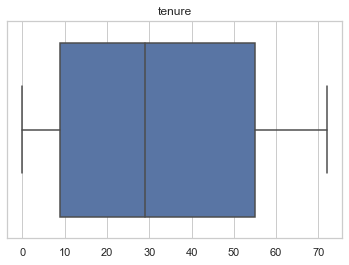

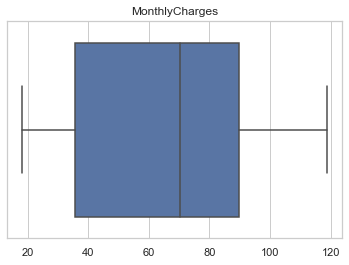

In [10]:
for i in series:
    sns.set(style="whitegrid")
    ax = sns.boxplot(data= df, x=[i])
    plt.title(i)
    plt.show()

## Senior Citizens were more like to cancel their subscription. Customers who had Fibre Optic were more likely churn than those who had DSL, Customers who had no internet security, no Online Backup and customers who were on a month to month basis were more likely to cancel their subscriptions.

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

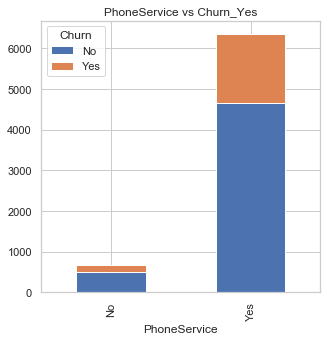

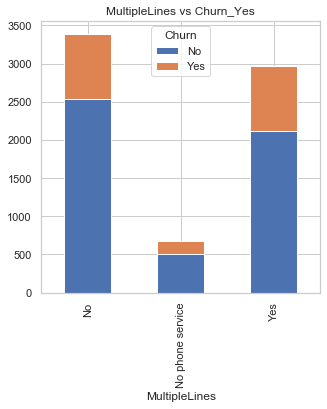

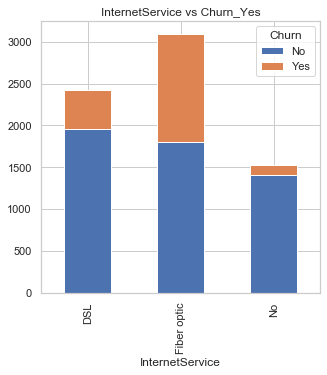

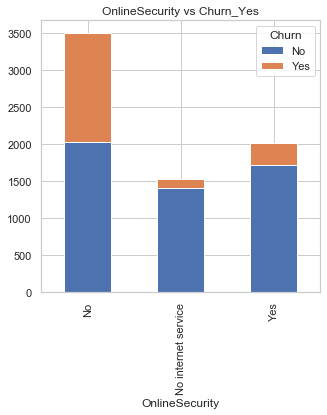

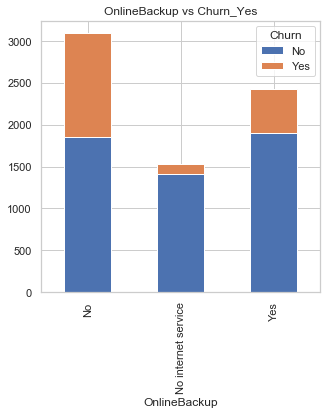

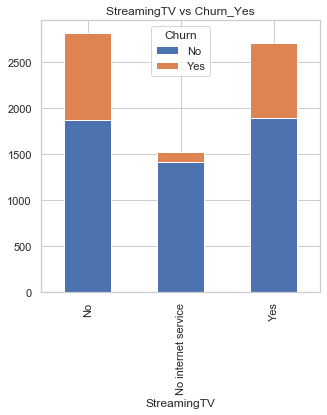

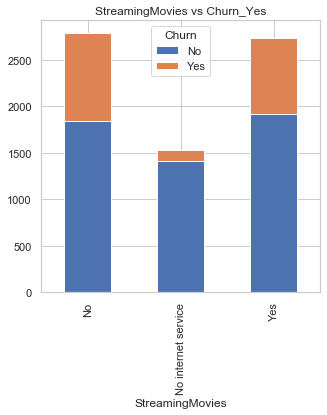

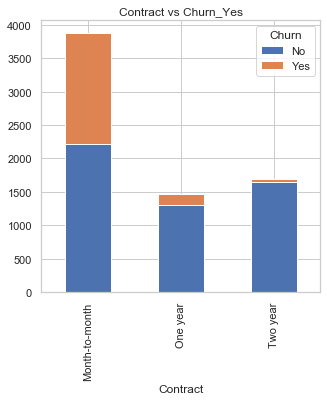

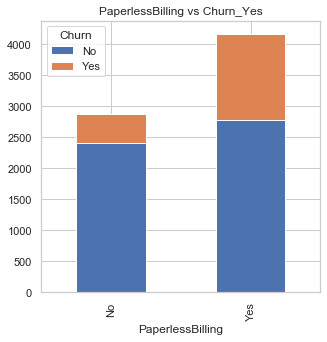

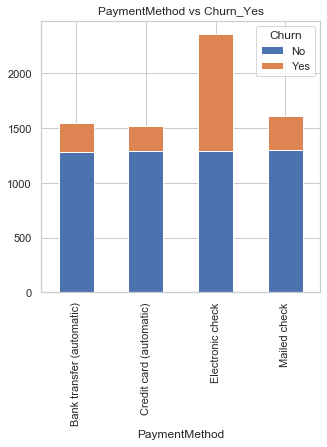

In [12]:
lst = ['PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup',
       'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling','PaymentMethod']

for i in lst:
    df.groupby([i, "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
    plt.title('{} vs Churn_Yes'.format(i))
    plt.show()

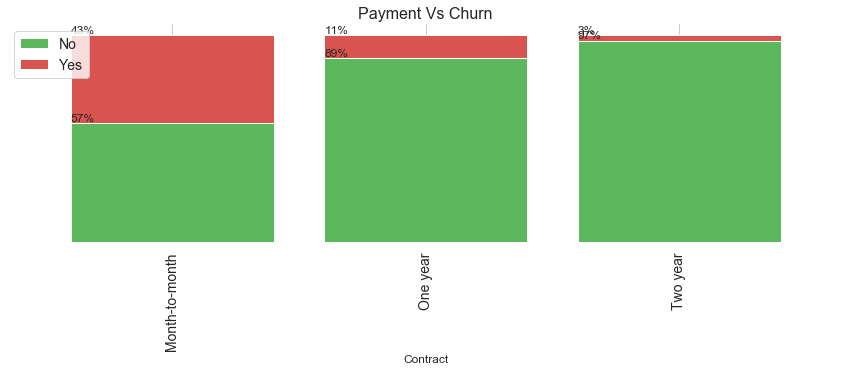

In [13]:
colors_list = ['#5cb85c','#d9534f']
result = df.groupby(["Contract", "Churn"]).size().unstack()
# Change this line to plot percentages instead of absolute values
ax = (result.div(result.sum(1), axis=0)).plot(kind='bar',stacked=True,figsize=(15,4),width = 0.8,color = colors_list,edgecolor=None)
plt.legend(labels=result.columns,fontsize= 14)
plt.title("Payment Vs Churn",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

## We observed that the there was a high correlation between the customer churning and Monthly Charges, Senior Citizenship, their contract and internet services. This gave a impression that the tenure was higly correlated to the customer not churning.

In [14]:
# Tenure, InternetService, OnlineSecurity, OnlineBackup, Paperess Billing, Payment Method

In [15]:
data = df

In [16]:
data['PhoneService'] = data['PhoneService'].map({'Yes':1,'No':0})
data['MultipleLines'] = data['MultipleLines'].map({'Yes':1,'No':0, 'No phone service':2})
data['InternetService'] = data['InternetService'].map({'Fiber optic':1,'No':0, 'DSL':2})
data['OnlineSecurity'] = data['OnlineSecurity'].map({'Yes':1,'No':0, 'No internet service':2})
data['OnlineBackup'] = data['OnlineBackup'].map({'Yes':1,'No':0, 'No internet service':2})
data['StreamingTV'] = data['StreamingTV'].map({'Yes':1,'No':0, 'No internet service':2})
data['StreamingMovies'] = data['StreamingMovies'].map({'Yes':1,'No':0, 'No internet service':2})
data['Contract'] = data['Contract'].map({'Month-to-month':1,'Two year':0, 'One year':2})

In [17]:
# data.corr()['Churn_Yes'].sort_values().plot.bar()
# plt.title('Correlatiion rank')
# plt.show()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,2,2,0,...,No,No,0,0,1,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,1,0,2,1,...,Yes,No,0,0,2,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,1,0,2,1,...,No,No,0,0,1,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,0,2,2,1,...,Yes,Yes,0,0,2,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,1,0,1,0,...,No,No,0,0,1,Yes,Electronic check,70.70,151.65,Yes


## Splitting Data

In [18]:
exclude = ['customerID', 'gender', 'Partner', 'Dependents','DeviceProtection', 'TechSupport', 'PaperlessBilling','PaymentMethod', 'Churn_No','Churn_Yes','MultipleLines']

In [19]:
X = data.drop(exclude, axis=1)
y = data.iloc[:, -1:]

KeyError: "['Churn_No' 'Churn_Yes'] not found in axis"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Instantiate
## A decision tree classifier was used, the criterion being entropy level, the max depth that was recommended upon experimentaion was 4. Since the Churn Rate was binary, it was either the customer churns or not, the classifier was chosen over the regressor. 

In [ ]:
dt = DecisionTreeClassifier(max_depth=5,random_state = 1, criterion='gini')

## Fit

In [ ]:
clf = dt.fit(X_train, y_train)

## Predict

In [ ]:
y_pred = dt.predict(X_test)

## MSE 

In [ ]:
mse_dt = MSE(y_test, y_pred)
mse_dt

## Accuracy 

In [ ]:
score = accuracy_score(y_test, y_pred) 
print('The Score is %6.4f' % accuracy_score(y_test, y_pred))

In [ ]:
print('The accuracy on training set is %6.4f' % clf.score(X_train,y_train))
print('The accuracy on testing set is %6.4f' %clf.score(X_test, y_test))

In [ ]:
import os

os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

## Tree 

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('churned.png')
Image(graph.create_png())

## From our confusion matrix we are able to observe that there are 1435 True Positves, 150 False positives, 264 False Negatives, 264 True negatives. Our model has properly classified a majority of  our cases. 

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))